In [312]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")


# Se incluyen las categorías en la base

Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)

# Columnas disponibles

Producto.columns
Cultivo.columns
Zona.columns

# Listado de zonas y categorías de cultivos disponibles

Ventas_zona_producto_cultivo['Zona Ranking_'].unique()

Ventas_zona_producto_cultivo['Cultivo_Categoría'].unique()

Ventas_zona_producto_cultivo['Periodo'].unique()

Ventas_zona_producto_cultivo['Trimestre'].unique()

#Columnas auxiliares

Ventas_zona_producto_cultivo['Utilidad $M'] = Ventas_zona_producto_cultivo['Utilidad']/1000000

Ventas_zona_producto_cultivo['Utilidad/Utilidad_total (%)'] = Ventas_zona_producto_cultivo['Utilidad']*100/(Ventas_zona_producto_cultivo['Utilidad'].sum())




In [313]:
#Criterios para filtrar datos

Periodoconsiderado_2022 = Ventas_zona_producto_cultivo['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2021
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2020
Zonaconsiderada_Noroeste = Ventas_zona_producto_cultivo['Zona Ranking_'] == "01 Noroeste"
ZonaconsideradaZona2 = Ventas_zona_producto_cultivo['Zona Ranking_'] == "03 Zona 2"
ZonaconsideradaPacífico = Ventas_zona_producto_cultivo['Zona Ranking_'] == "02 Pacífico"
T1 = ['T1']
T1yT2 = ['T1', 'T2']
T1aT4 = ['T1', 'T2','T3', 'T4']
Catdecultivo = Ventas_zona_producto_cultivo['Cultivo_Categoría'] == "Hortalizas"
AdmCat_Cito = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo['H1 o H2 o Resto'] == "H2"


# Plan del primer trimestre 2022 de Pacífico

In [314]:

# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    ZonaconsideradaPacífico ]

Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    ZonaconsideradaPacífico &
    AdmCat_Cito]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    ZonaconsideradaPacífico &
    AdmCat_Suelo]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    ZonaconsideradaPacífico &
    AdmCat_Bioest]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    ZonaconsideradaPacífico &
    AdmCat_Coady]

# Utilidad total y desglose por categoría

In [315]:

print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$11.903 M


In [316]:
Desgloseporhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria']
                                        ).agg(
                                                {'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Desgloseporhorizonte_)

,Utilidad $M
Administracion de la categoria,
1 Cito,3.693531
2 Raiz/ suelo,4.645453
3 Bioestimulante,1.190742
4 Coadyuvante,2.373257


In [317]:
Desgloseporhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['H1 o H2 o Resto']
                                        ).agg(
                                                {'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Desgloseporhorizonte_)

,Utilidad $M
H1 o H2 o Resto,
H1,10.135096
H2,0.542471
Resto,1.225416


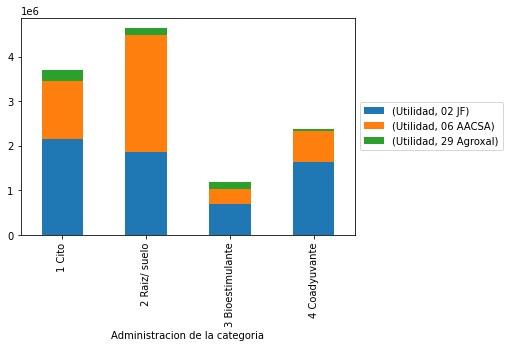

In [318]:

# Plan 2022 desglosado por cliente y categoría

Utilidadporclienteycategoria = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'}).reset_index()
Utilidadporclienteycategoria_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'})
# Gráfica de barras
pd.DataFrame(Utilidadporclienteycategoria_.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()




# Listado de top 15 clientes, categorías y cultivos

In [319]:
Detalle2022_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                                ['Cultivo_Categoría','Administracion de la categoria','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
Detalle2022_sorted_ = Detalle2022_.sort_values(by=['Utilidad $M'],ascending=False)
Detalle2022_sorted_.head(10)


Utilidad $M  \
Cultivo_Categoría       Administracion de la categoria RM/ REIQ_Ranking                
Berries                 1 Cito                         02 JF                1.923399   
                        2 Raiz/ suelo                  06 AACSA             1.235525   
                                                       02 JF                1.206407   
                        4 Coadyuvante                  02 JF                1.058350   
Frutales siempre verdes 2 Raiz/ suelo                  06 AACSA             0.726389   
                        1 Cito                         06 AACSA             0.711099   
                        2 Raiz/ suelo                  02 JF                0.649305   
                        4 Coadyuvante                  02 JF                0.585032   
Hortalizas              2 Raiz/ suelo                  06 AACSA             0.535417   
Berries                 1 Cito                         06 AACSA             0.493693   

                                                                            Volumen  
Cultivo_Categoría       Administracion de la categoria RM/ REIQ_Ranking              
Berries                 1 Cito                         02 JF              6469.2800  
                        2 Raiz/ suelo                  06 AACSA          11792.0000  
                                                       02 JF             11521.5000  
                        4 Coadyuvante                  02 JF             26274.0792  
Frutales siempre verdes 2 Raiz/ suelo                  06 AACSA           7671.0000  
                        1 Cito                         06 AACSA           2355.0000  
                        2 Raiz/ suelo                  02 JF              8445.0000  
                        4 Coadyuvante                  02 JF             14823.0000  
Hortalizas              2 Raiz/ suelo                  06 AACSA           4878.0000  
Berries                 1 Cito                         06 AACSA           1635.0000

# Suma de utilidad de top 15 clientes, categorías y cultivos

In [320]:
print('${:,.3f} M'.format(Detalle2022_sorted_['Utilidad $M'].head(10).sum()))

$9.125 M


# Cito, 2022

In [321]:
#¿Cuánto representa Cito en valor y respecto a la utilidad total?

In [322]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )

$3.694 M
%31.0 


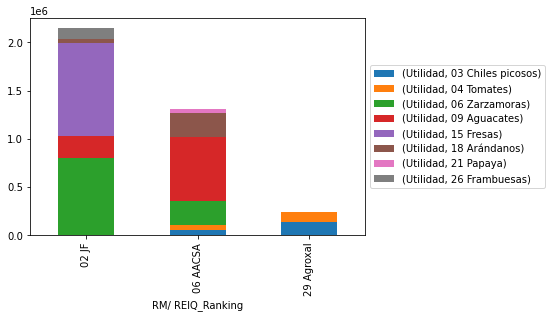

In [323]:

# Cito 2022 desglosado por cliente y cultivo
Utilidadporclienteycultivo = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
Utilidadporclienteycultivo_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
Utilidadporclienteycultivo_df = pd.DataFrame(Utilidadporclienteycultivo_.unstack(level = 1))
Utilidadporclienteycultivo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Listado de top 10 clientes y cultivos (Cito)

In [324]:
DetalleCito2022_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleCito2022_sorted_ = DetalleCito2022_.sort_values(by=['Utilidad $M'],ascending=False)
DetalleCito2022_sorted_.head(5)

,,Utilidad $M,Volumen
Cultivo_Categoría,RM/ REIQ_Ranking,,
Berries,02 JF,1.923399,6469.28
Frutales siempre verdes,06 AACSA,0.711099,2355.00
Berries,06 AACSA,0.493693,1635.00
Hortalizas,29 Agroxal,0.238663,790.40
Frutales siempre verdes,02 JF,0.224768,756.00


In [325]:
print('${:,.3f} M'.format(DetalleCito2022_sorted_['Utilidad $M'].head(5).sum()))

$3.592 M


# Raíz/ Suelo, 2022

In [326]:

print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )

$4.645 M
%39.0 


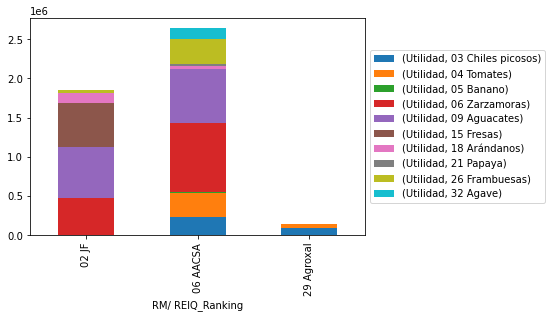

In [327]:
# Suelo 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoSuelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoSuelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoSuelo_df = pd.DataFrame(UtilidadporclienteycultivoSuelo_.unstack(level = 1))
UtilidadporclienteycultivoSuelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Top 10 

In [328]:
DetalleSuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleSuelo2022_sorted = DetalleSuelo2022.sort_values(by=['Utilidad $M'],ascending=False)
DetalleSuelo2022_sorted.head(10)

Utilidad $M  Volumen
Cultivo_Categoría       RM/ REIQ_Ranking                      
Berries                 06 AACSA             1.235525  11792.0
                        02 JF                1.206407  11521.5
Frutales siempre verdes 06 AACSA             0.726389   7671.0
                        02 JF                0.649305   8445.0
Hortalizas              06 AACSA             0.535417   4878.0
                        29 Agroxal           0.149810   1345.2
Industriales            06 AACSA             0.142600   3000.0

In [329]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad $M'].head(10).sum()))

$4.645 M


# Bioestimulante, 2022

In [330]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )



$1.191 M
%10.0 


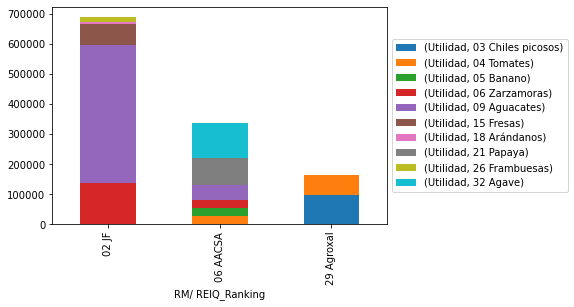

In [331]:
# Bioest 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoBioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoBioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoBioest_df = pd.DataFrame(UtilidadporclienteycultivoBioest_.unstack(level = 1))
UtilidadporclienteycultivoBioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Top 10 

In [332]:
DetalleBioest2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleBioest2022_sorted = DetalleBioest2022.sort_values(by=['Utilidad $M'],ascending=False)
DetalleBioest2022_sorted.head(10)

,,Utilidad $M,Volumen
Cultivo_Categoría,RM/ REIQ_Ranking,,
Frutales siempre verdes,02 JF,0.458133,4856.80
Berries,02 JF,0.230791,2748.25
Frutales siempre verdes,06 AACSA,0.164611,2347.50
Hortalizas,29 Agroxal,0.164464,1368.00
Industriales,06 AACSA,0.117594,2250.00
Hortalizas,06 AACSA,0.029165,455.00
Berries,06 AACSA,0.025984,350.00


In [333]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad $M'].head(10).sum()))

$1.191 M


# Coady 2022

In [334]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )


$2.373 M
%19.9 


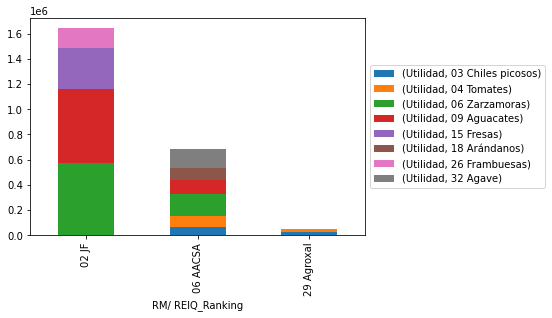

In [335]:
# Bioest 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoCoady = Ventas_zona_producto_cultivo_Coady_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoCoady_ = Ventas_zona_producto_cultivo_Coady_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoCoady_df = pd.DataFrame(UtilidadporclienteycultivoCoady_.unstack(level = 1))
UtilidadporclienteycultivoCoady_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Anexo: Resumen por cliente y horizonte

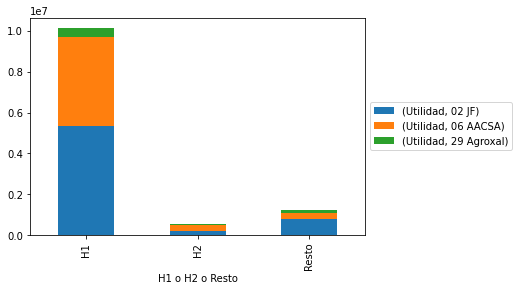

In [336]:
# Plan 2022 desglosado por cliente y horizonte

Utilidadporclienteyhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['H1 o H2 o Resto','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'})
# Gráfica de barras
pd.DataFrame(Utilidadporclienteyhorizonte_.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



#  Anexo: Resumen por producto

In [337]:
Producto_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','H1 o H2 o Resto','Producto_Ranking']
                                        ).agg({'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Producto_)

# Anexo: Resumen  por cliente

In [338]:
Zona_ = Ventas_zona_producto_cultivo_2022.groupby(
                                            ['RM/ REIQ_Ranking','RM/ REIQ_x']
                                    ).agg({'Utilidad $M': 'sum'}).sort_values(by=['Utilidad $M'], ascending = False).style.bar(subset=['Utilidad $M'], color='red')
display(Zona_)

,,Utilidad $M
RM/ REIQ_Ranking,RM/ REIQ_x,
02 JF,JF,6.336185
06 AACSA,AACSA,4.965515
29 Agroxal,Agroxal,0.601283


# Anexo: Por cultivo

In [339]:
Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]
Ventas_zona_producto_cultivo_2022_= Ventas_zona_producto_cultivo_2022[Ventas_zona_producto_cultivo_2022['Cultivo_Categoría_Ranking'] != "-"]


Cultivo_ = Ventas_zona_producto_cultivo_2022_.groupby(
                                                ['Cultivo_Categoría_Ranking']
                                                ).agg({'Utilidad $M': 'sum'},{'Utilidad/Utilidad_total (%)': 'sum'}).sort_values(by=['Cultivo_Categoría_Ranking','Utilidad $M'], ascending = True).style.bar(subset=['Utilidad $M'], color='red')
display(Cultivo_)

,Utilidad $M
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,3.635134
03 Hortalizas,1.419229
05 Berries,6.437493
08 Industriales,0.411127


In [340]:
Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]
Ventas_zona_producto_cultivo_2022_= Ventas_zona_producto_cultivo_2022[Ventas_zona_producto_cultivo_2022['Cultivo_Categoría_Ranking'] != "-"]


Cultivo_ = Ventas_zona_producto_cultivo_2022_.groupby(
                                                ['Cultivo_Categoría_Ranking']
                                                ).agg({'Utilidad $M': 'sum'},{'Utilidad/Utilidad_total (%)': 'sum'}).sort_values(by=['Cultivo_Categoría_Ranking','Utilidad $M'], ascending = True).style.bar(subset=['Utilidad $M'], color='red')
display(Cultivo_)

,Utilidad $M
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,3.635134
03 Hortalizas,1.419229
05 Berries,6.437493
08 Industriales,0.411127
